# EHealth 705

## Python Tutorial: Probability Distributions in Python

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Contents
1. [Introduction to Seaborn for statistical data visualization.](#Seaborn)
2. [Theoretical refresher on probability distributions.](#Theoretical)
3. [Simulating discrete and continuous distributions in Python](#discrete_and_continuous_distributions)
4. [Visualizing distributions using Python libraries.](#Visualizing)
5. [Practical exercise: Simulate a distribution](#Practical_exercise)
6. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
7. [Assignment](#Assignment)



#### Date : Feb 1st, 2024


#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)
  
  
  
#### Explanation  
  
  
  
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

In [1]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Introduction to Seaborn for statistical data visualization <a id="Seaborn"></a>

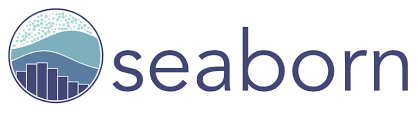
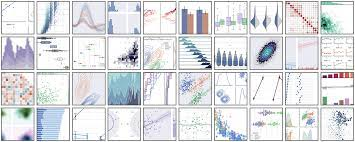



Seaborn is a powerful and versatile Python data visualization library that builds on Matplotlib to create beautiful, informative statistical graphics. It provides a high-level interface for drawing attractive statistical plots, making it easier to understand complex datasets and uncover underlying patterns. This summary will guide you through the essentials of manipulating Seaborn to leverage its full potential for your statistical data visualization needs.


Import Seaborn alongside Matplotlib for additional customization options:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt



## Univariate Distribution

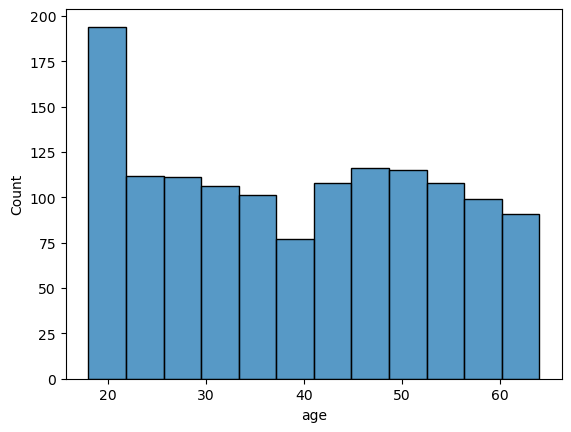

In [3]:

# Create a simple histogram to visualize age distribution
sns.histplot(df['age'])
plt.show()


## Bivariate Distribution
To visualize the relationship between 'bmi' and 'charges':

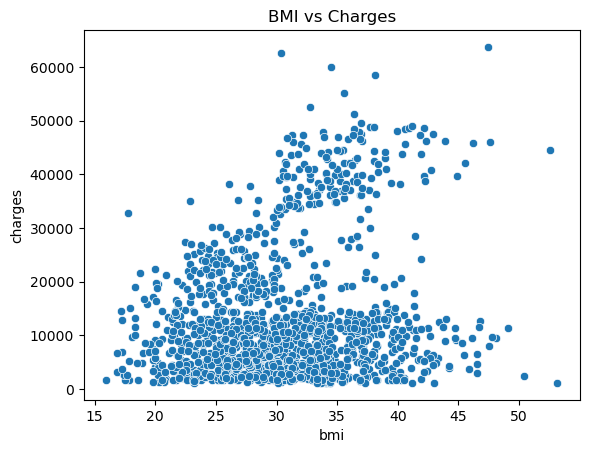

In [4]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()


## Categorical Data Plotting
To compare charges for smokers and non-smokers:

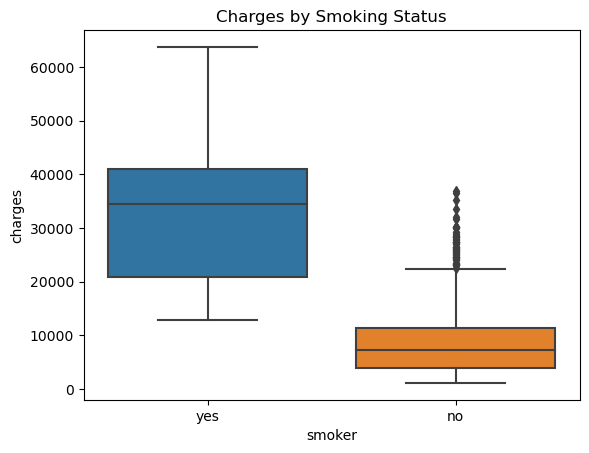

In [5]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()


## Pairwise Relationships
To explore pairwise relationships between 'age', 'bmi', and 'charges':

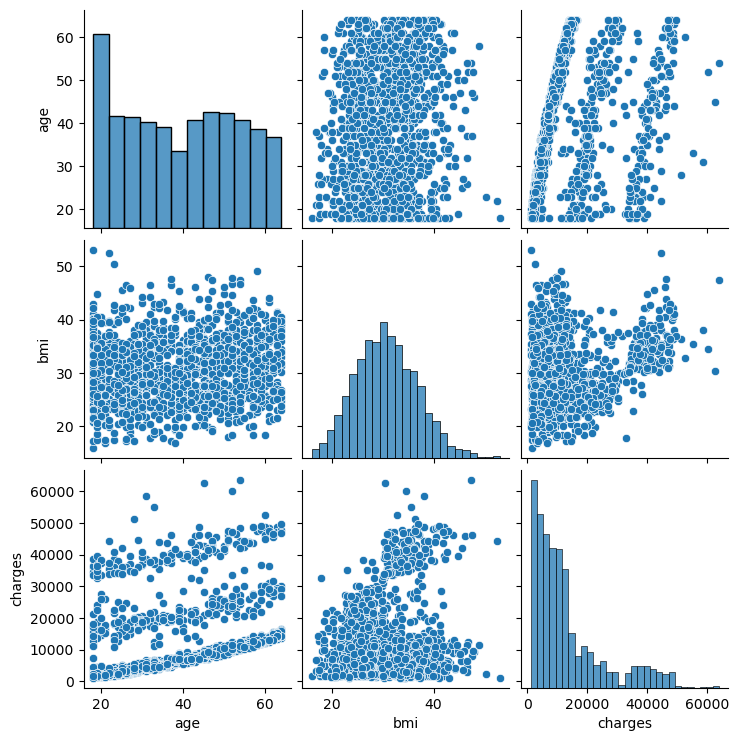

In [6]:
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.show()


## Heatmap
To create a heatmap of the correlation matrix:

C:\Users\Shirin\AppData\Local\Temp\ipykernel_6216\2535688633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


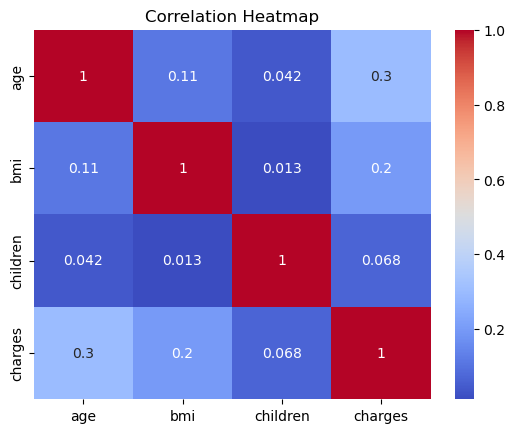

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Advanced Plots
For more complex relationships, such as the impact of region and smoking on charges:

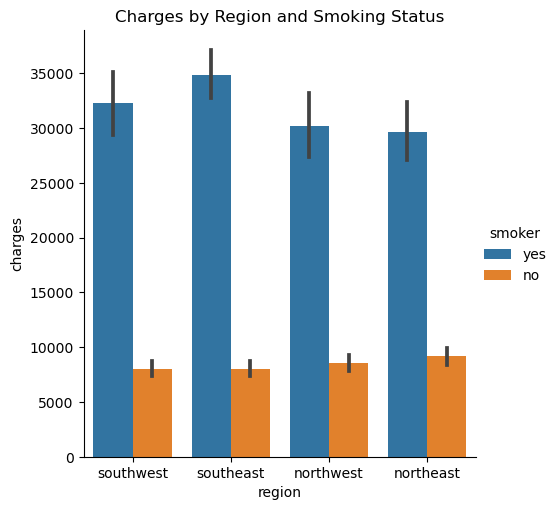

In [8]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df)
plt.title('Charges by Region and Smoking Status')
plt.show()


## Conclusion
This tutorial provided a quick start guide to visualizing data with Seaborn using the insurance dataset. For more in-depth exploration, check the Seaborn documentation and the examples provided by the community.

Happy visualizing!

# Theoretical refresher on probability distributions <a id="Theoretical"></a>

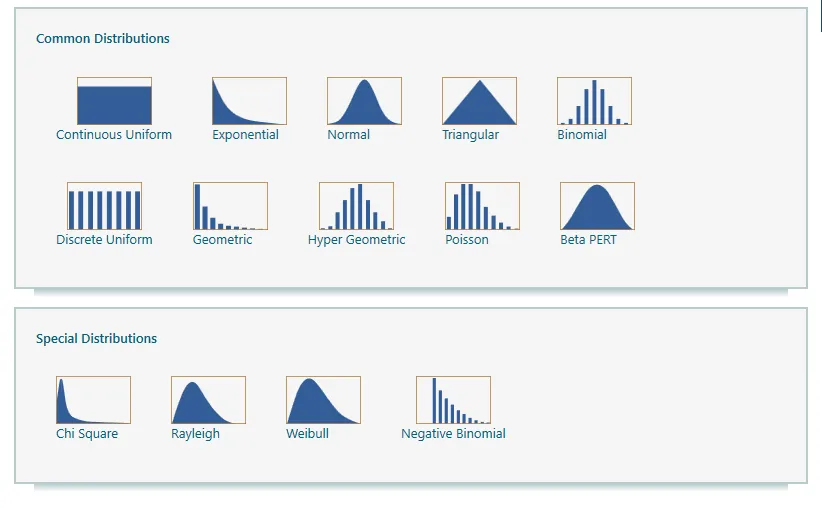
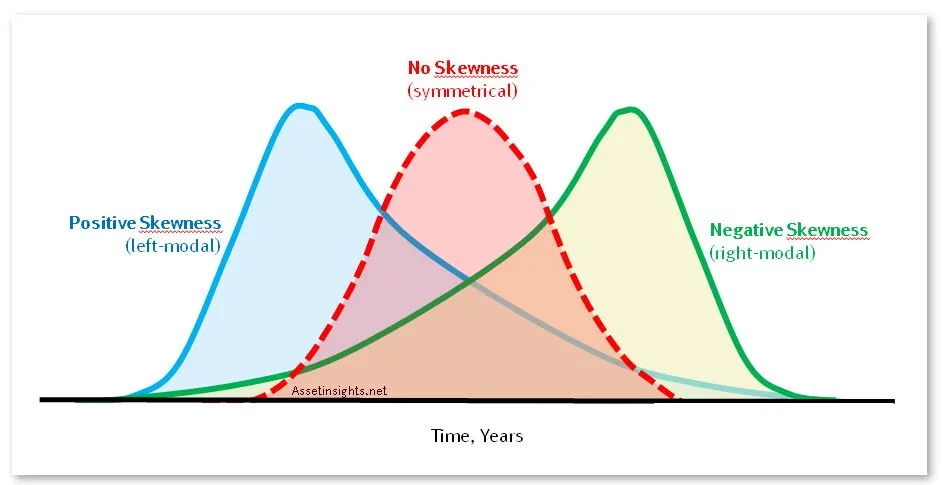

## Theoretical Refresher on Probability Distributions
Probability distributions are a fundamental concept in statistics, providing a framework to model the randomness and uncertainty in the data. They can be classified into two categories: discrete and continuous.


## Distribution Center
There are different parameters which charaterize the center of distribution with different parameters. The data can be evaluated by their rank or by their value. The most commonly used parameter are following :-
1. Mean :- BY talking about mean we are talking about the average or the arithmetic mean. It is calculated by the (sum of the observations)/no of observations.
$$
\bar{X}=\frac{\sum_{i=1}^n x_i}{n}=\frac{x_1+x_2+\grave{\lambda}+x_n}{n}
$$
1.2.Median :- The median value is the that is the half way when the data are ranked in order. In contrast to the mean, the median is not affected by the outlier.
$$
\text { Median }=\left(\frac{n+1}{n}\right)^{\text {th }} \text { term }
$$

2. Mode :- Mode refers to the most frequent occurring value in a distribution.
$$
\text { Mode }=l+h\left(\frac{f_m-f_1}{2 f_m-f_1-f_2}\right)
$$

Where,
1 = Lower Boundary of modal class
$h=$ size of model class
$f_m=$ Frequency corresponding to modal class
$f_1=$ Frequency preceding to modal class
$f_2=$ Frequency proceeding to modal class
3. Geometric Mean :- Geometric mean can be used to describe the location the distribution. It can be calculated via by the arithmetic mean of the log of the values.
$$
\text { mean }_{\text {geometric }}=\left(\prod_{i=1}^N x_i\right)^{1 / N}=\exp \left(\frac{\sum_i \ln \left(x_i\right)}{n}\right)
$$


### Normal Distribution

The normal distribution, also known as the Gaussian distribution, is one of the most important probability distributions. It is symmetric and has a bell-shaped curve, where the mean, median, and mode of the distribution are equal.


####  The Empirical rule
- Approximately $68 \%$ of the data lie within one standard deviation of the mean, that is, in the interval with endpoints $x^{-} \pm s$ for samples and with endpoints $\mu \pm \sigma$ for populations; if a data set has an approximately bell-shaped relative frequency histogram.
- Approximately $95 \%$ of the data lie within two standard deviations of the mean, that is, in the interval with endpoints $x^{-} \pm 2 \mathrm{~s}$ for samples and with endpoints $\mu \pm 2 \sigma$ for populations; and
- Approximately $99.7 \%$ of the data lies within three standard deviations of the mean, that is, in the interval with endpoints $x^{-} \pm 3$ s for samples and with endpoints $\mu \pm 3 \sigma$ for populations.

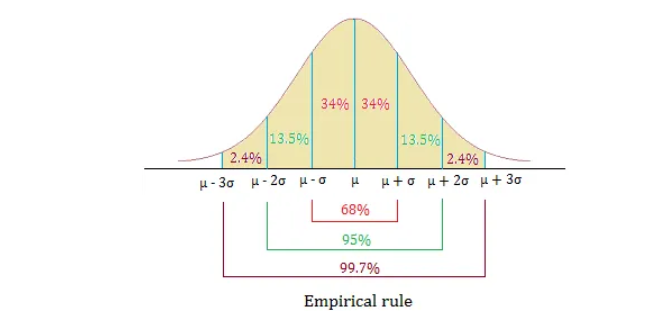

#### Probability Density Function (PDF)

The PDF of a normal distribution describes the likelihood of a random variable taking on a particular value.



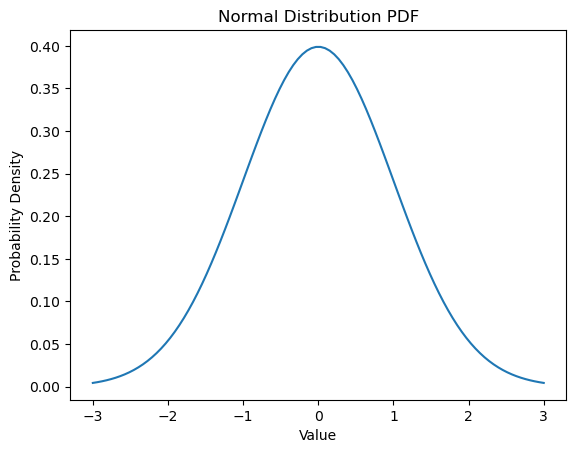

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu, sigma = 0, 1  # mean and standard deviation

# Create a range of values (x) and their corresponding PDF values (y)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the PDF of the normal distribution
plt.plot(x, y)
plt.title('Normal Distribution PDF')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


####  Cumulative Distribution Function (CDF)
The CDF of a normal distribution shows the probability that a random variable will be less than or equal to a certain value.

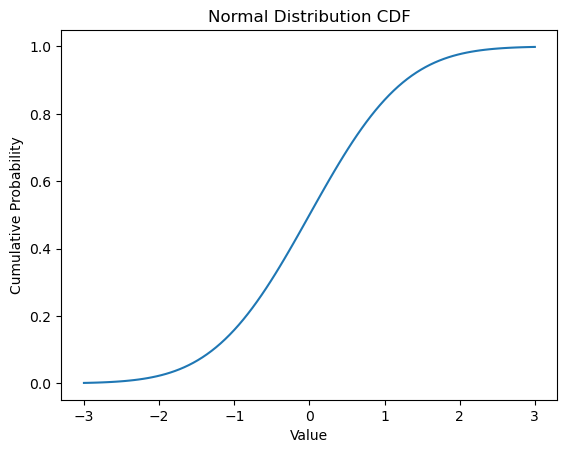

In [10]:
# Generate the CDF values for the range of values
y_cdf = norm.cdf(x, mu, sigma)

# Plot the CDF
plt.plot(x, y_cdf)
plt.title('Normal Distribution CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()


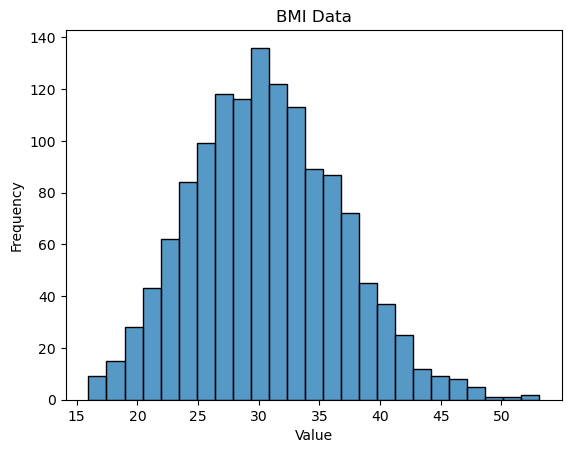

In [11]:

# Plot the normalized data
sns.histplot(df['bmi'], kde=False)
plt.title('BMI Data')
plt.xlabel( 'Value')
plt.ylabel('Frequency')
plt.show()


### Standardization and Normalization

Before diving into data analysis, it's common to transform the data to be on a similar scale. This can be done through standardization or normalization.

- **Standardization**: Transforms data to have a mean of zero and a standard deviation of one.
- **Normalization**: Rescales data to the range [0, 1].


To compare different variables or to make them compatible with algorithms that assume data to be normally distributed, we use standardization and normalization.


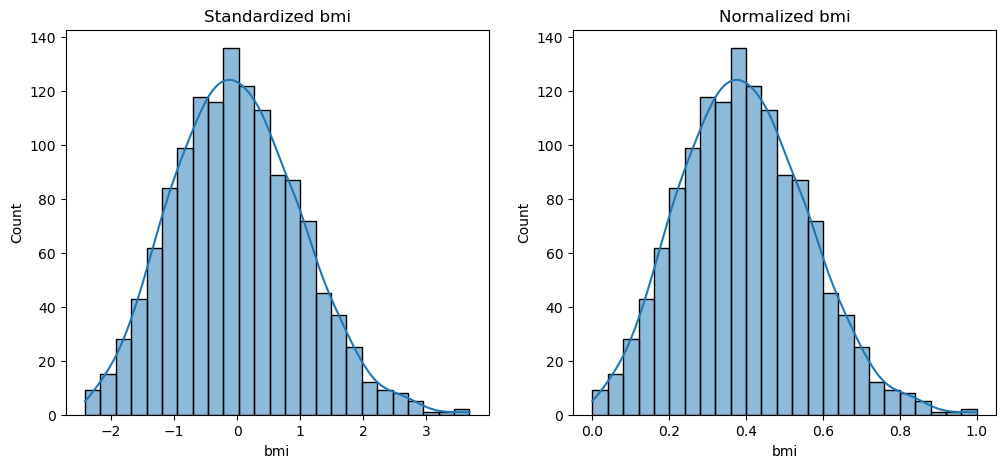

In [12]:

# Standardizing and normalizing data from the dataset
bmi = df['bmi']
bmi_standardized = (bmi - bmi.mean()) / bmi.std()
bmi_normalized = (bmi - bmi.min()) / (bmi.max() - bmi.min())

# Visualizing the standardized and normalized bmi
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(bmi_standardized, ax=ax[0], kde=True)
ax[0].set_title('Standardized bmi')
sns.histplot(bmi_normalized, ax=ax[1], kde=True)
ax[1].set_title('Normalized bmi')
plt.show()


### Skewness

Skewness measures the asymmetry of the probability distribution of a real-valued random variable. The skewness value can be positive, negative, or undefined.

- **Positive Skew**: The right tail is longer; the bulk of the values lie to the left of the mean.
- **Negative Skew**: The left tail is longer; the bulk of the values lie to the right of the mean.

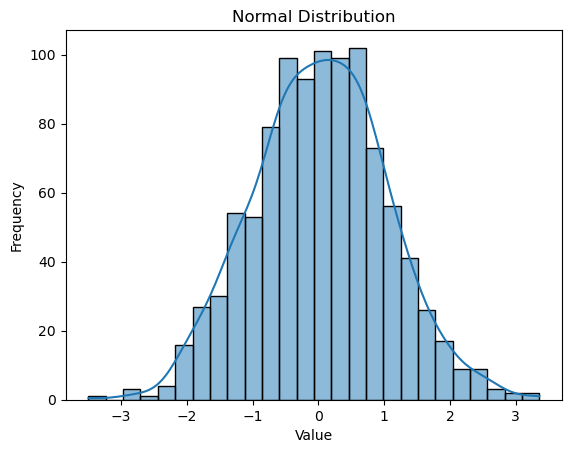

Skewness of the normal distribution: 0.041442737871082755


In [13]:

from scipy.stats import skew

# Simulating a normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Visualizing the normal distribution
sns.histplot(normal_data, kde=True)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculating and displaying skewness
print(f'Skewness of the normal distribution: {skew(normal_data)}')


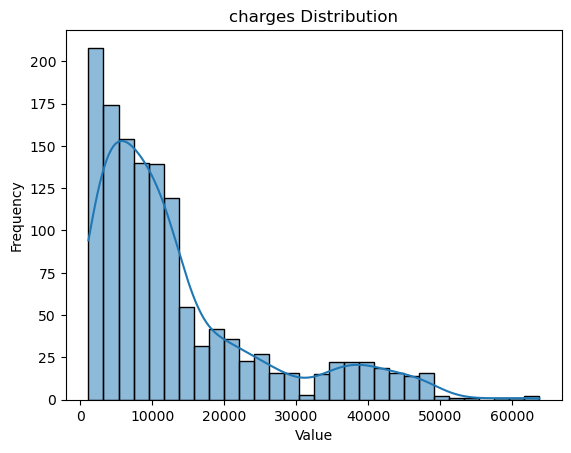

Skewness of the charges distribution: 1.5141797118745743


In [14]:

# Visualizing the normal distribution
sns.histplot(df['charges'], kde=True)
plt.title('charges Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculating and displaying skewness
print(f'Skewness of the charges distribution: {skew(df["charges"])}')

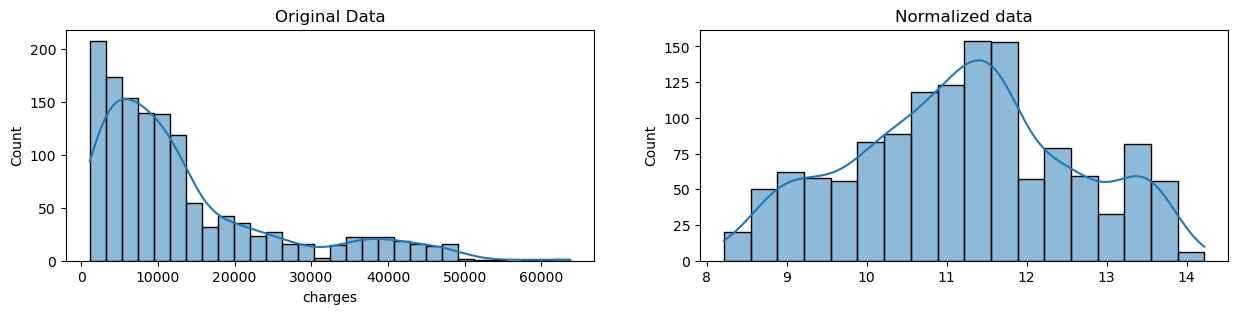

In [15]:
# for Box-Cox Transformation
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df["charges"])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df["charges"], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# Simulating discrete and continuous distributions in Python <a id="discrete_and_continuous_distributions"></a>

### Discrete Probability Distributions

Discrete distributions describe the probability of occurrence of distinct, countable outcomes. For example, the number of heads in a series of coin flips can be modeled using a binomial distribution.

- **Binomial Distribution**: Used when there are two possible outcomes (success or failure) for a given number of experiments.
- **Poisson Distribution**: Ideal for modeling the number of times an event happens over a specified interval or continuum.

#### Binomial Distribution

The binomial distribution is a common discrete distribution that models the number of successes in a sequence of independent experiments.


####  Poisson Distribution
The Poisson distribution models the number of times an event occurs in an interval of time or space.

Example: Simulating the number of claims (assuming 'charges' column represents claims) a policyholder will make in a year.

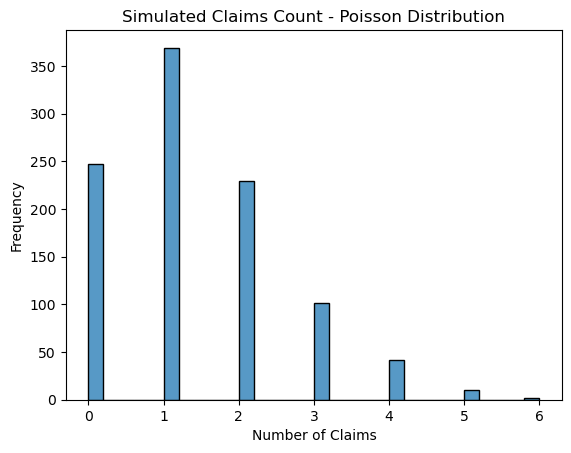

In [16]:
# Assuming the average charges represent the average number of claims
lambda_claims = df['charges'].mean() / 10000  # scale down for simulation purposes

# Define the size variable (the number of simulations)
size = 1000  # for example, simulating 1000 claims


claims_simulated = np.random.poisson(lam=lambda_claims, size=size)

# Plot the simulated data
sns.histplot(claims_simulated, bins=30, kde=False)
plt.title('Simulated Claims Count - Poisson Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.show()


### Continuous Probability Distributions

Continuous distributions model scenarios where outcomes take on values in a continuous range.

- **Normal (Gaussian) Distribution**: The most well-known distribution, characterized by its symmetrical, bell-shaped curve.
- **Uniform Distribution**: Assumes all outcomes in a range are equally likely.
- **Exponential Distribution**: Often used to model the time elapsed between events.

#### Normal Distribution
The normal (or Gaussian) distribution is a common continuous distribution, often used to model natural phenomena.

#### Uniform Probability Distribution

The uniform distribution is a type of continuous probability distribution where every outcome is equally likely within a specified range. This distribution is useful when you have no reason to expect any outcome to be more likely than any other.

#### Exponential Distribution
The exponential distribution is often used to model the time between independent events that happen at a constant rate.

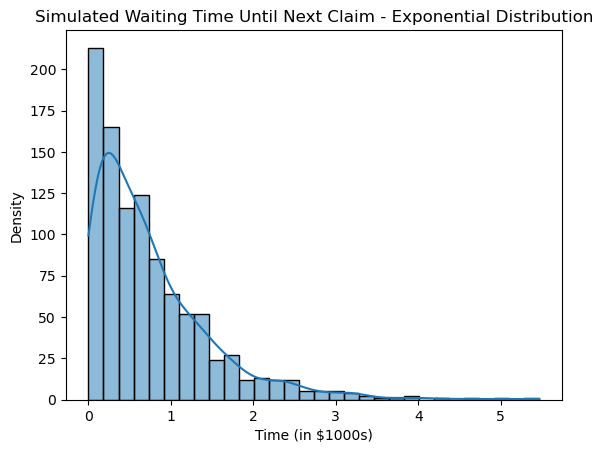

In [17]:
scale_time = 1 / lambda_claims
waiting_time_simulated = np.random.exponential(scale=scale_time, size=size)

# Plot the simulated data
sns.histplot(waiting_time_simulated, bins=30, kde=True)
plt.title('Simulated Waiting Time Until Next Claim - Exponential Distribution')
plt.xlabel('Time (in $1000s)')
plt.ylabel('Density')
plt.show()


# Visualizing distributions using Python libraries<a id="Visualizing"></a>

<Axes: ylabel='Frequency'>

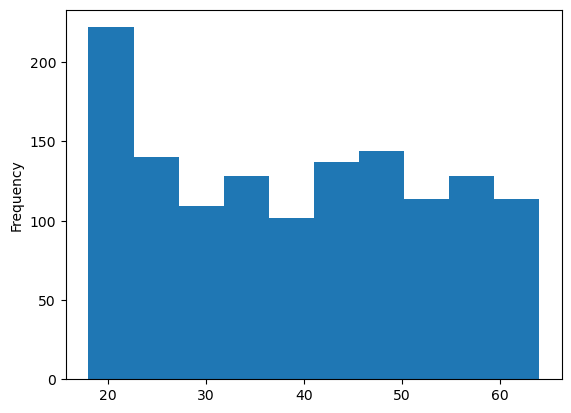

In [18]:
df['age'].plot(kind = 'hist')

Text(0.5, 1.0, 'Age Distribution')

<Figure size 1000x1600 with 0 Axes>

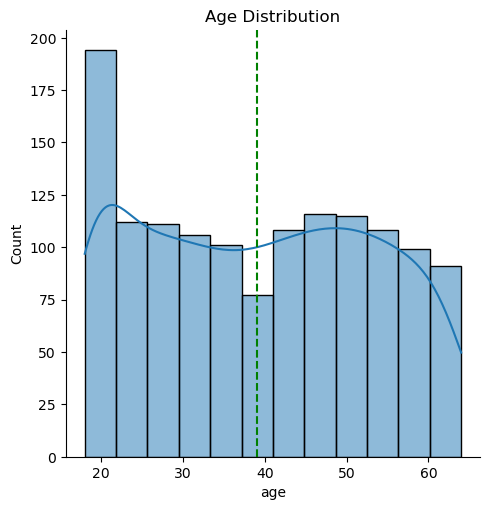

In [19]:
plt.figure(figsize=(10, 16))
ax = sns.displot(data = df, x = 'age', kde = True)

plt.axvline(39, linestyle = '--', color = 'green', label = 'mean Age')
plt.title('Age Distribution')

<Axes: ylabel='Frequency'>

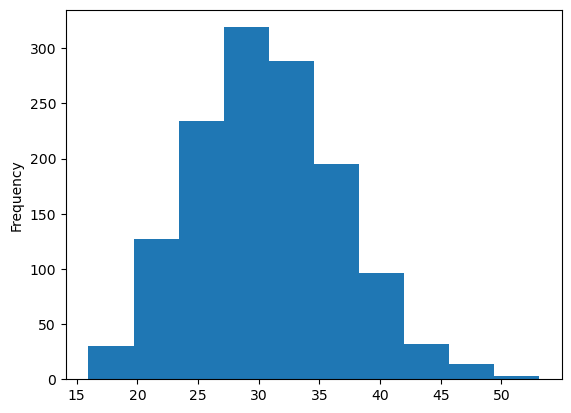

In [20]:
#Analysis of BMI

df['bmi'].plot(kind = 'hist')

Text(0.5, 1.0, 'BMI distribution')

<Figure size 1600x600 with 0 Axes>

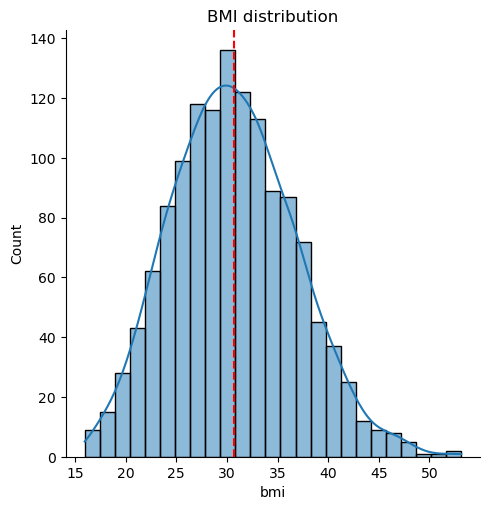

In [21]:
bmi_des = df['bmi'].describe()

plt.figure(figsize=(16,6))
sns.displot(df['bmi'], kde = True)
plt.axvline(bmi_des['mean'], linestyle = "--", color = "red")
plt.title('BMI distribution')

# Practical exercise: Simulate a distribution<a id="Practical_exercise"></a>


#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

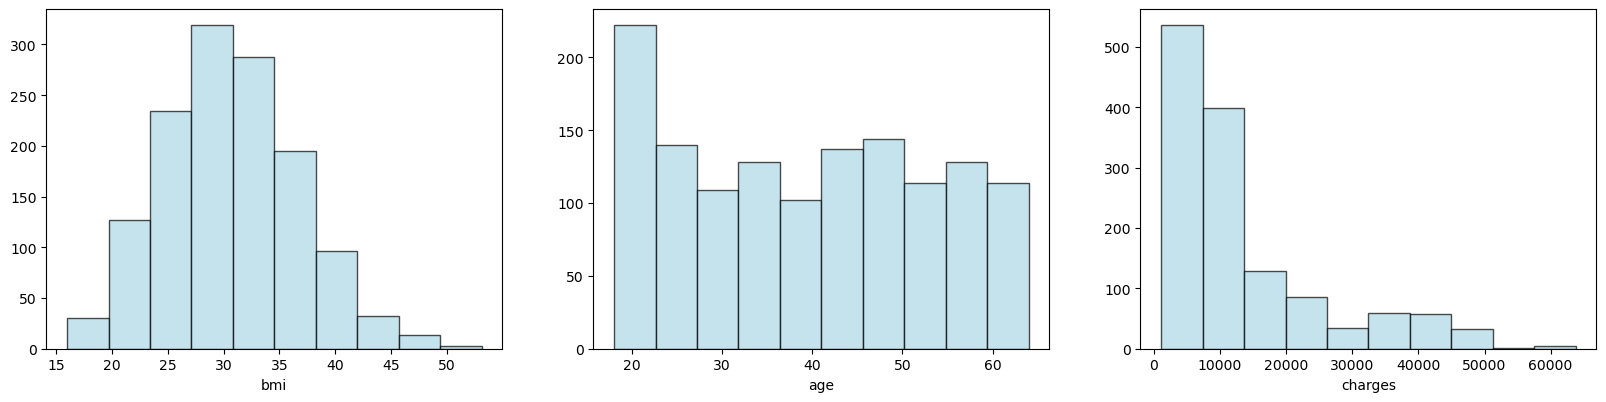

In [26]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

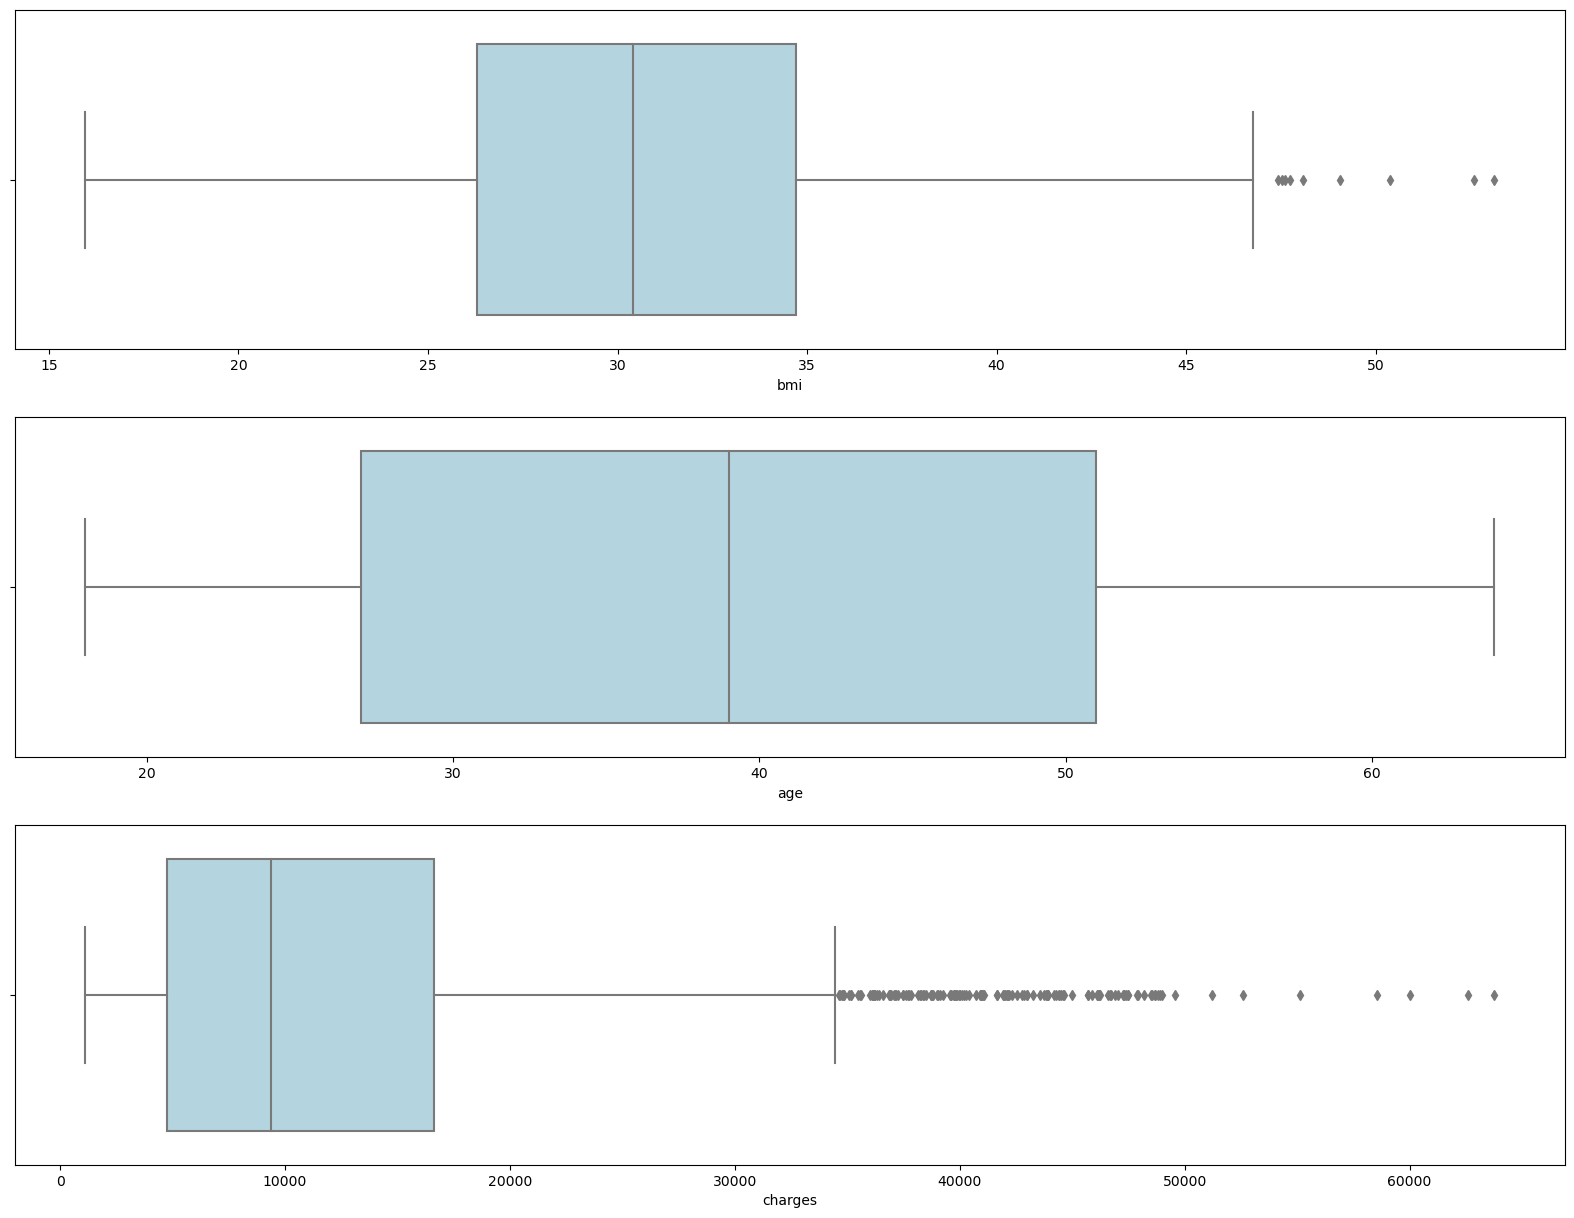

In [27]:
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

* bmi has a few extreme values
* charges as it is highly skewed, there are quiet a lot of extreme values

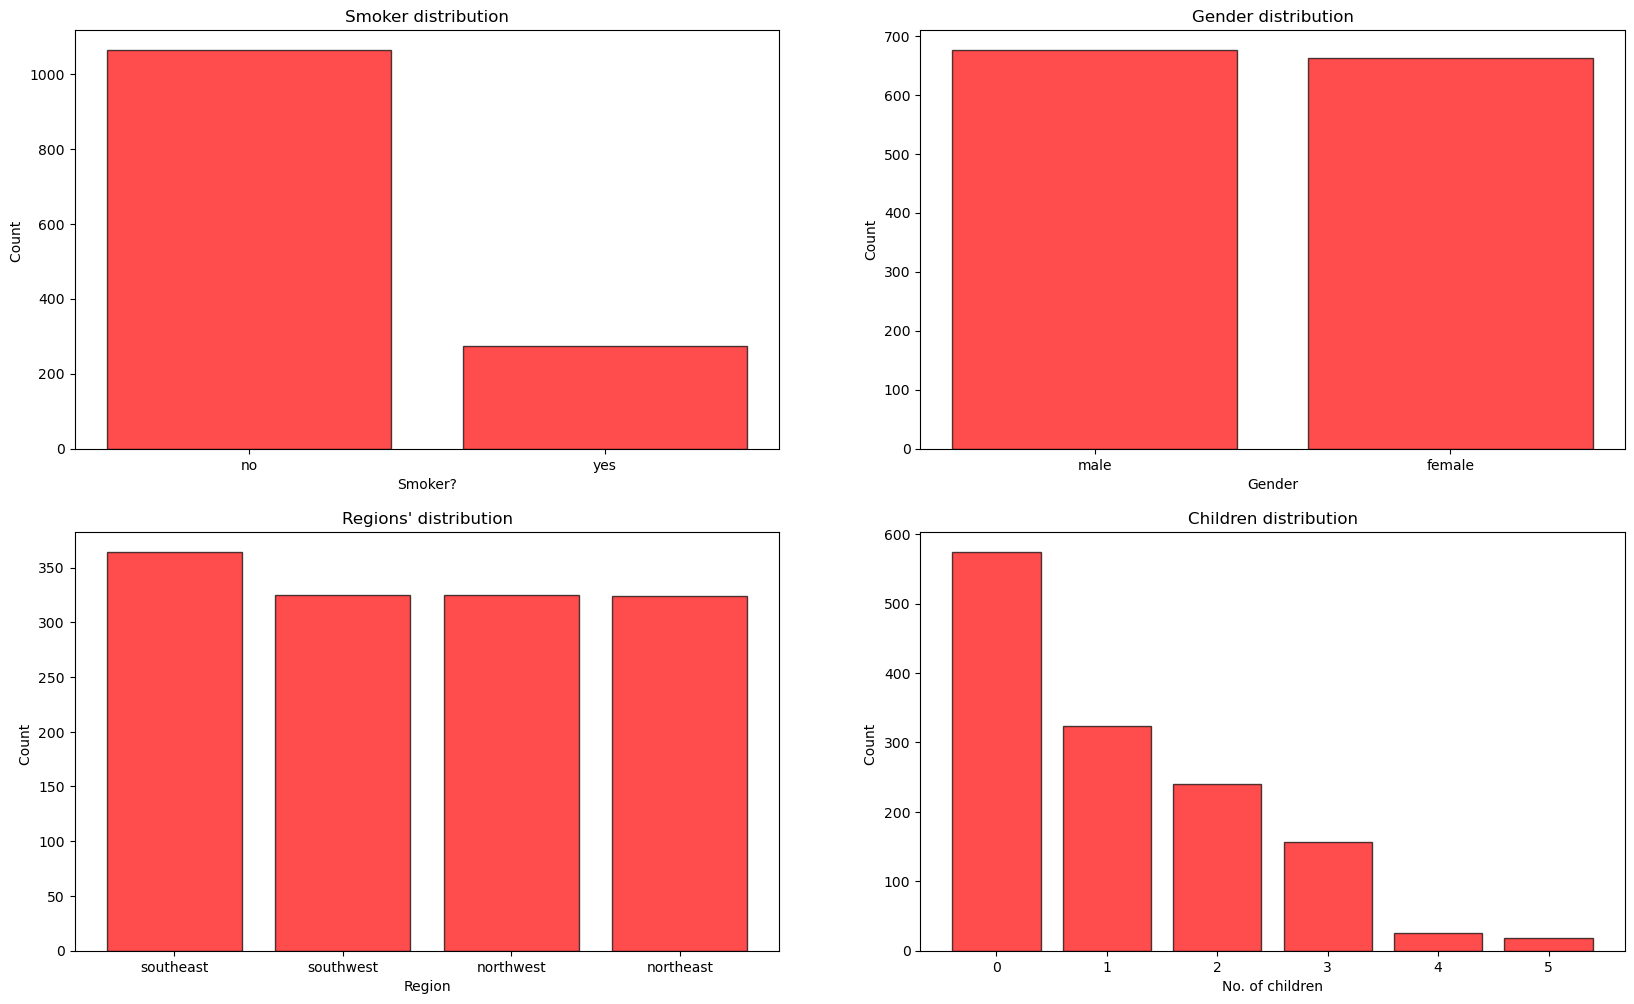

In [28]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

* There are a lot more non-smokers than there are smokers in the data
* Instances are distributed evenly accross all regions
* Gender is also distributed evenly
* Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair

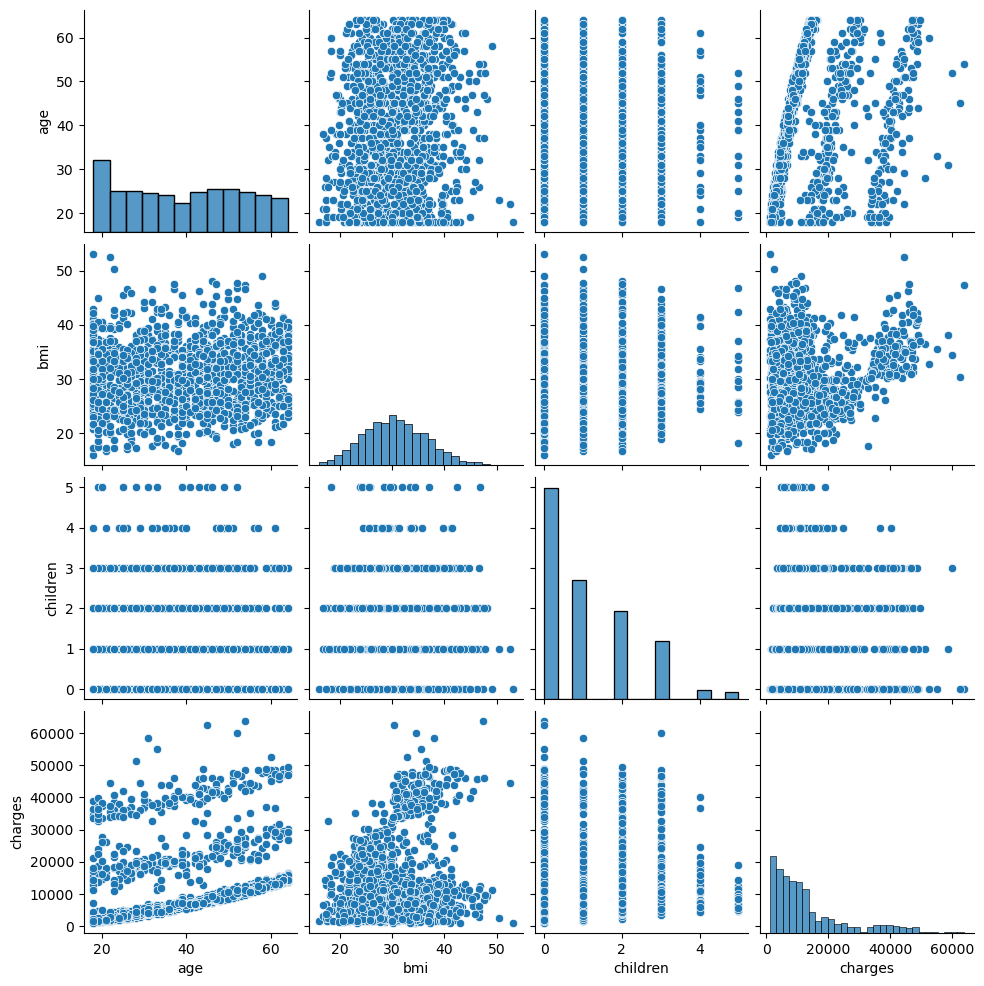

In [29]:
sns.pairplot(df)  #pairplot
plt.show()

* The only obvious correlation of 'charges' is with 'smoker'
* Looks like smokers claimed more money than non-smokers
* There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

[Text(0.5, 1.0, 'Smoker vs Charges')]

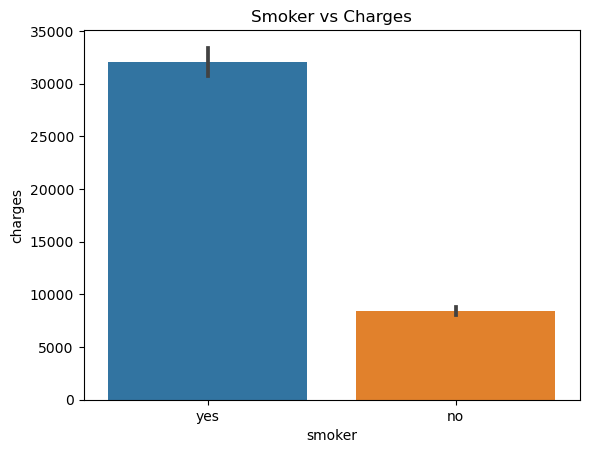

In [30]:
#smoker vs charges
sns.barplot(x=df.smoker,y=df.charges).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Region Vs Charges')]

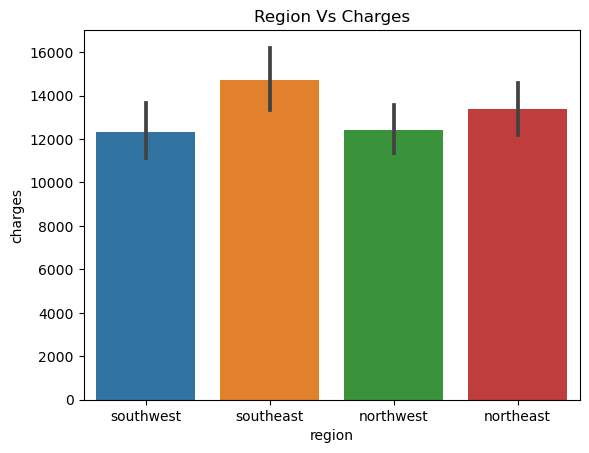

In [31]:
sns.barplot(x='region',y='charges',data=df).set(title='Region Vs Charges')

In [32]:
category1=pd.cut(df.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
df.insert(6,'AgeBin',category1)

[Text(0.5, 1.0, 'Age Vs Charges')]

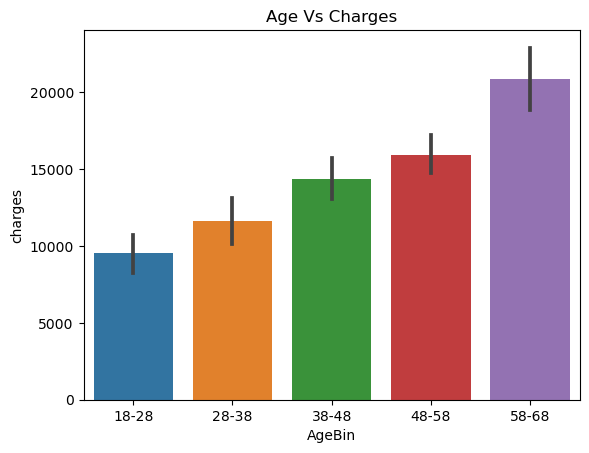

In [33]:
sns.barplot(x=df.AgeBin,y=df.charges).set(title='Age Vs Charges')

# Q&A and Troubleshooting <a id="QA-and-Troubleshooting"></a>

#### Seaborn Resources
- **Seaborn Official Website and Cheat Sheet**: Essential resources for getting started with Seaborn for statistical data visualization.
  - [Seaborn Official Website](https://seaborn.pydata.org/)

#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

#### Probability Distributions and Simulations
- **Understanding and Simulating Probability Distributions**:
  - [Probability Distribution through Python Code](https://karliris62.medium.com/probability-distribution-through-python-code-data-science-in-experiment-299ac949d342)
  - [Exploring Normal Distribution with Jupyter Notebook](https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8)
  - [Python for Data 22: Probability Distributions](https://www.kaggle.com/code/hamelg/python-for-data-22-probability-distributions)
  - [Understanding Probability Distributions Using Python](https://towardsdatascience.com/understanding-probability-distributions-using-python-9eca9c1d9d38)

#### Data Preprocessing
- **Scaling and Normalization**:
  - [Scaling and Normalization on Kaggle](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization)

#### Practical Exercise Solutions and Insights
- **Analyzing Insurance Dataset for Practical Exercises**:
  - [Insurance EDA & Data Visualization](https://www.kaggle.com/code/aathikm/insurance-eda-data-visualization)
  - [EDA and Statistics for Medical Costs](https://www.kaggle.com/code/saurav9786/eda-and-statistics-for-medical-costs)
  - [Statistics for Data Scientists](https://www.kaggle.com/code/saurav9786/statistics-for-data-scientists)
  - [Insurance Claims EDA & Hypothesis Testing](https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing)


# Assignment <a id="Assignment"></a>

### Assignment 1 


You are given a dataset with a `smoker` column indicating whether the individual is a smoker. Assume that the probability of an individual being a smoker is the same as in the dataset. Your task is to simulate the expected number of smokers in a sample of 100 individuals and create a visualization of the simulated distribution.

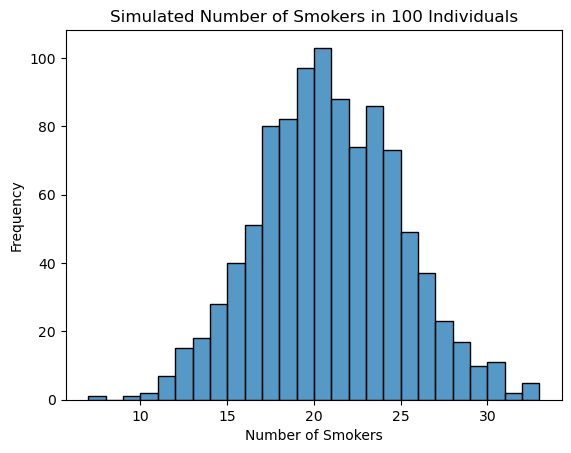

In [34]:
# Calculate the probability of an individual being a smoker
smoker_prob = df['smoker'].value_counts(normalize=True)['yes']

# Define the number of trials and the sample size
n_trials = 100
sample_size = 1000

# Simulate the binomial distribution
simulated_smokers = np.random.binomial(n=n_trials, p=smoker_prob, size=sample_size)

# Plot the results
sns.histplot(simulated_smokers, kde=False)
plt.title('Simulated Number of Smokers in 100 Individuals')
plt.xlabel('Number of Smokers')
plt.ylabel('Frequency')
plt.show()


### Assignment 2

Using the given dataset `df`, perform a multivariate analysis to explore the relationship between `bmi`, `smoker` status, and `charges `. Create a scatter plot with `bmi ` on the x-axis and `charges` on the y-axis, and use color to differentiate smokers from non-smokers. Additionally, compute and display the correlation coefficient between `bmi ` and `charges` for smokers and non-smokers separately.

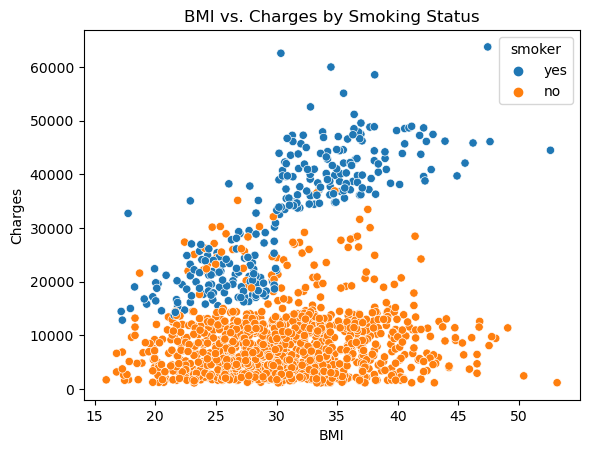

The correlation coefficient between BMI and charges for smokers is: 0.81
The correlation coefficient between BMI and charges for non-smokers is: 0.08


In [35]:
# Scatter plot for BMI vs. Charges, differentiated by smoker status
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs. Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Calculating correlation coefficients
smokers_corr = df[df['smoker'] == 'yes'][['bmi', 'charges']].corr().iloc[0,1]
nonsmokers_corr = df[df['smoker'] == 'no'][['bmi', 'charges']].corr().iloc[0,1]

print(f"The correlation coefficient between BMI and charges for smokers is: {smokers_corr:.2f}")
print(f"The correlation coefficient between BMI and charges for non-smokers is: {nonsmokers_corr:.2f}")
